<a href="https://colab.research.google.com/github/RenzoAlvaroshan/Tensorflow-Tutorial/blob/master/TF_2_0_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-05-08 00:29:56--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-05-08 00:29:56 (41.9 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [0]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1)
Y = data[:,1]

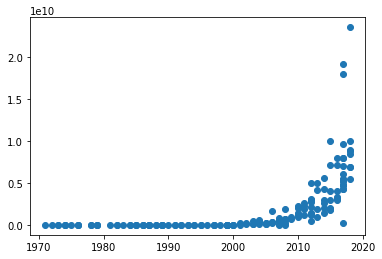

In [19]:
plt.scatter(X, Y)

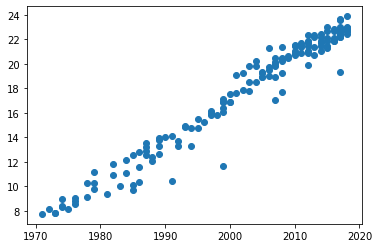

In [20]:
Y = np.log(Y)
plt.scatter(X, Y)

In [0]:
X = X - X.mean()

In [22]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)                                    
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 522.6301 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 780.4656 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 750.1574 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 330.3465 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 310.6542 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 227.1750 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 121.4559 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 90.1866 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 52.5773 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 37.5617 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 

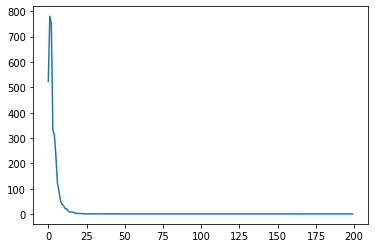

In [23]:
plt.plot(r.history['loss'], label='loss')

In [24]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.3352907]], dtype=float32), array([17.775873], dtype=float32)]


In [0]:
a = model.layers[0].get_weights()[0][0,0]

In [26]:
print("Time to double:", np.log(2) / a)

Time to double: 2.0673021355863206


In [27]:
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204
